In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
from bs4 import BeautifulSoup 

In [2]:
final_df = pd.read_csv("web_scraping_final")

In [45]:
final_df

,brand,model,variant_type,CC,gear_type,Boot_Space,price,gear_type_num
0,Tata,Punch,Pure,1199,Manual,366.0,582000,0
1,Tata,Punch,Pure Rhythm,1199,Manual,366.0,614000,0
2,Tata,Punch,Adventure,1199,Manual,366.0,664000,0
3,Tata,Punch,Adventure Rhythm,1199,Manual,366.0,699000,0
4,Tata,Punch,Adventure AMT,1199,Automatic,366.0,724000,1
...,...,...,...,...,...,...,...,...
849,Mercedes-Benz,AMG C 63,Coupe,3982,Automatic,150.0,14100000,1
850,Mercedes-Benz,AMG C 43,4MATIC Coupe,2996,Automatic,150.0,8109000,1
851,Mercedes-Benz,AMG E 53,4MATIC Plus,2999,Manual,150.0,10600000,0
852,Mercedes-Benz,AMG E 63,4MATIC Plus,3982,Automatic,150.0,17300000,1


In [47]:
final_df.describe()

,CC,Boot_Space,price,gear_type_num
count,854.000000,854.000000,8.540000e+02,854.000000
mean,1928.621780,301.456674,5.257300e+06,0.537471
std,978.802635,142.306663,8.991315e+06,0.501231
min,796.000000,74.000000,3.390000e+05,0.000000
25%,1199.000000,150.000000,9.490000e+05,0.000000
50%,1497.000000,318.000000,1.422000e+06,1.000000
75%,2194.500000,385.000000,4.896500e+06,1.000000
max,6498.000000,825.000000,9.000000e+07,2.000000


In [49]:
final_df.select_dtypes(include="object").describe()

,brand,model,variant_type,gear_type
count,854,854,854,854
unique,24,161,688,3
top,Tata,Nexon,S,Automatic
freq,171,64,6,457


In [4]:
final_df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
final_df.CC.astype("int")

0      1199
1      1199
2      1199
3      1199
4      1199
       ... 
849    3982
850    2996
851    2999
852    3982
853    2996
Name: CC, Length: 854, dtype: int32

In [6]:
final_df

,brand,model,variant_type,CC,gear_type,Boot_Space,price
0,Tata,Punch,\nPure\n,1199,Manual,366.0,582
1,Tata,Punch,\nPure Rhythm\n,1199,Manual,366.0,614
2,Tata,Punch,\nAdventure\n,1199,Manual,366.0,664
3,Tata,Punch,\nAdventure Rhythm\n,1199,Manual,366.0,699
4,Tata,Punch,\nAdventure AMT\n,1199,Automatic,366.0,724
...,...,...,...,...,...,...,...
849,Mercedes-Benz,AMG C 63,\nCoupe\n,3982,Automatic,NaN,14100
850,Mercedes-Benz,AMG C 43,\n4MATIC Coupe\n,2996,Automatic,NaN,8109
851,Mercedes-Benz,AMG E 53,\n4MATIC Plus\n,2999,Manual,NaN,10600
852,Mercedes-Benz,AMG E 63,\n4MATIC Plus\n,3982,Automatic,NaN,17300


In [7]:
final_df.Boot_Space.fillna(150,inplace=True)

In [8]:
final_df.isnull().sum()

brand           0
model           0
variant_type    0
CC              0
gear_type       0
Boot_Space      0
price           0
dtype: int64

In [9]:
final_df.variant_type = final_df.variant_type.apply(lambda x: re.sub("[\n]","",str(x)))

In [10]:
final_df.head(2)

,brand,model,variant_type,CC,gear_type,Boot_Space,price
0,Tata,Punch,Pure,1199,Manual,366.0,582
1,Tata,Punch,Pure Rhythm,1199,Manual,366.0,614


In [11]:
final_df.dtypes

brand            object
model            object
variant_type     object
CC                int64
gear_type        object
Boot_Space      float64
price             int64
dtype: object

In [12]:
final_df.to_csv("final_web_scrapping.csv")

# EDA

In [13]:
final_df

,brand,model,variant_type,CC,gear_type,Boot_Space,price
0,Tata,Punch,Pure,1199,Manual,366.0,582
1,Tata,Punch,Pure Rhythm,1199,Manual,366.0,614
2,Tata,Punch,Adventure,1199,Manual,366.0,664
3,Tata,Punch,Adventure Rhythm,1199,Manual,366.0,699
4,Tata,Punch,Adventure AMT,1199,Automatic,366.0,724
...,...,...,...,...,...,...,...
849,Mercedes-Benz,AMG C 63,Coupe,3982,Automatic,150.0,14100
850,Mercedes-Benz,AMG C 43,4MATIC Coupe,2996,Automatic,150.0,8109
851,Mercedes-Benz,AMG E 53,4MATIC Plus,2999,Manual,150.0,10600
852,Mercedes-Benz,AMG E 63,4MATIC Plus,3982,Automatic,150.0,17300


In [55]:
final_df["price"] = final_df["price"]*1000

In [56]:
final_df

,brand,model,variant_type,CC,gear_type,Boot_Space,price,gear_type_num
0,Tata,Punch,Pure,1199,Manual,366.0,582000000,0
1,Tata,Punch,Pure Rhythm,1199,Manual,366.0,614000000,0
2,Tata,Punch,Adventure,1199,Manual,366.0,664000000,0
3,Tata,Punch,Adventure Rhythm,1199,Manual,366.0,699000000,0
4,Tata,Punch,Adventure AMT,1199,Automatic,366.0,724000000,1
...,...,...,...,...,...,...,...,...
849,Mercedes-Benz,AMG C 63,Coupe,3982,Automatic,150.0,14100000000,1
850,Mercedes-Benz,AMG C 43,4MATIC Coupe,2996,Automatic,150.0,8109000000,1
851,Mercedes-Benz,AMG E 53,4MATIC Plus,2999,Manual,150.0,10600000000,0
852,Mercedes-Benz,AMG E 63,4MATIC Plus,3982,Automatic,150.0,17300000000,1


In [16]:
final_df.shape

(854, 7)

##### observation
* from this we can observed that there are 854 rows and 7 columns

In [17]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         854 non-null    object 
 1   model         854 non-null    object 
 2   variant_type  854 non-null    object 
 3   CC            854 non-null    int64  
 4   gear_type     854 non-null    object 
 5   Boot_Space    854 non-null    float64
 6   price         854 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 46.8+ KB


# observation
* from the above Dataframe we can observ that there are two integer column,one float column and four object type column
* There are no null alues in the any columns

In [18]:
final_df.describe()

,CC,Boot_Space,price
count,854.000000,854.000000,8.540000e+02
mean,1928.621780,301.456674,5.257300e+06
std,978.802635,142.306663,8.991315e+06
min,796.000000,74.000000,3.390000e+05
25%,1199.000000,150.000000,9.490000e+05
50%,1497.000000,318.000000,1.422000e+06
75%,2194.500000,385.000000,4.896500e+06
max,6498.000000,825.000000,9.000000e+07


# univariate analysis

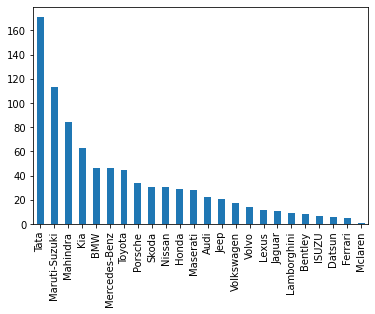

In [19]:
final_df.brand.value_counts().plot.bar()
plt.show()

#### observation
* From the above plot we can conclude that Tata  brand has more car models compare to the all brands and  Maruti_Suzuki is in second place then followed by Mahindra and Mclaren have less varients compare to the all brands

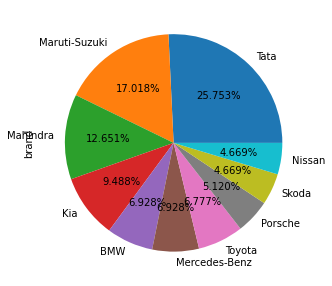

In [20]:
plt.figure(figsize=(10,5))
final_df.brand.value_counts().nlargest(10).plot.pie(autopct="%.3f%%")
plt.show()

##### observation
* From the above observation we can conclude that in the top 10 brands Tata occupied 25.753% and then follwed by maruti_suzuki and in 10 Th place Nissan

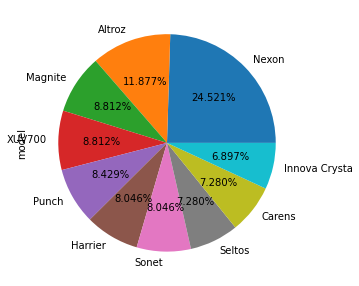

In [21]:
plt.figure(figsize = (10,5))
final_df.model.value_counts()[:10].plot.pie(autopct = "%.3f%%")
plt.show()

##### observation
* From the above observation we can conclude that in the top 10 brands Nexon occupied 24.521% and then follwed by altroz with 11.877% and in 10 Th place innova crysta with 6.897%

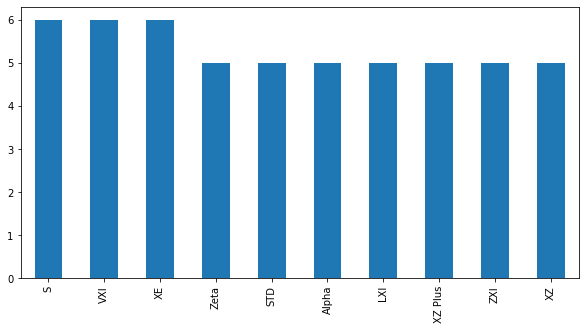

In [22]:
plt.figure(figsize = (10,5))
final_df.variant_type.value_counts()[:10].plot.bar()
plt.show()

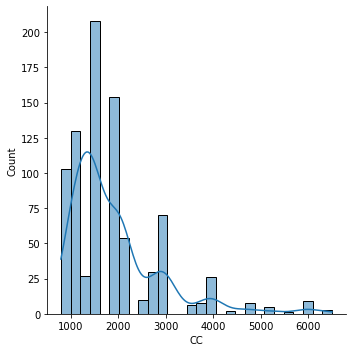

In [57]:
sns.displot(final_df.CC,kde=True)

##### observation 
* From this we can observe that maximum cars are in between 1000 to 200 cc

<AxesSubplot:>

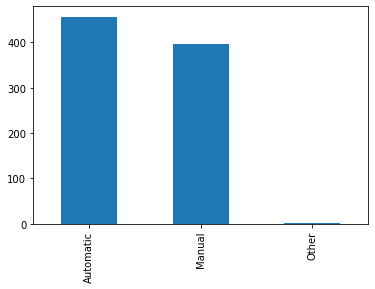

In [24]:
final_df.gear_type.value_counts().plot.bar()

##### Observation
* From the above plot we can conclude that Automatics gear varients has more models then Manual and others
* There are more than 400 automatic cars, 400 manual cars and there are less then 100 Other cars

<AxesSubplot:>

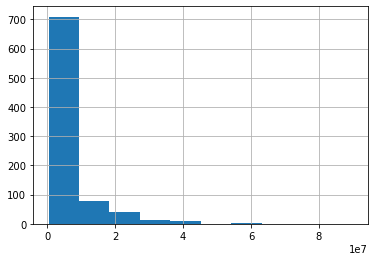

In [25]:
final_df.price.hist(bins=10)

##### observation
* we have divided price into ten category and from that we can observe that max number of cars are between 0 to 2 crores

# bivariate anlysis

In [26]:
final_df.columns

Index(['brand', 'model', 'variant_type', 'CC', 'gear_type', 'Boot_Space',
       'price'],
      dtype='object')

In [27]:
final_df.CC.corr(final_df.price)

0.8395023909798437

###### observaion
* correlation between price and cc is positive correlation, if the cc increases price also increases

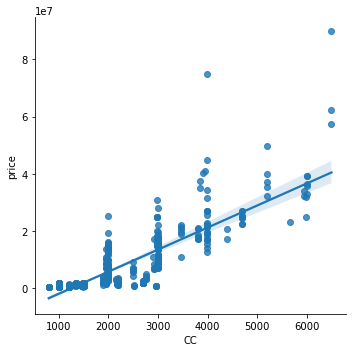

In [28]:
sns.lmplot(x='CC',y='price',data=final_df)

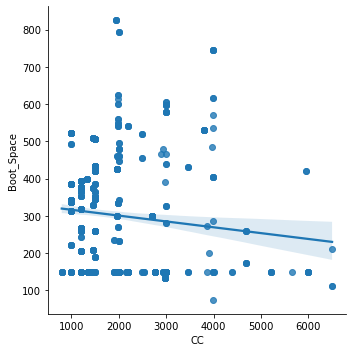

In [29]:
sns.lmplot(x="CC",y="Boot_Space",data=final_df)
plt.show()

##### observation
* From the above plot we can conclude that if the cc increases the boot space will decreases they both are negative correlation

In [30]:
num = final_df.select_dtypes(include = "number")

<AxesSubplot:>

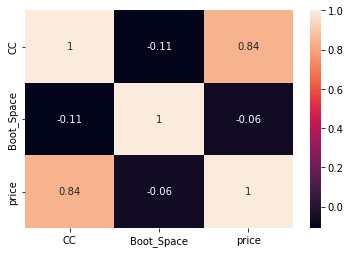

In [31]:
sns.heatmap(num.corr(),annot = True)

##### observation 
* From the above heatmap we can observe that if cc increases Boot space decreases there are negative correlation
* From the above heatmap we can conclude that if the price increases the cc will also increases there are poistive correlation

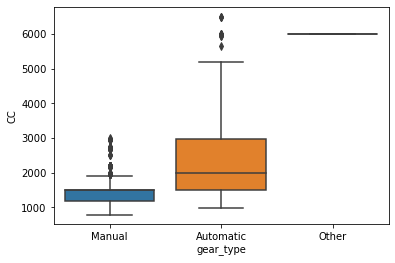

In [32]:
sns.boxplot(x="gear_type",y="CC",data=final_df)
plt.show()

##### obseravtion 
* cars above 2000 cc have less manual gear cars 
* cars above 5000 cc have less auto gear cars

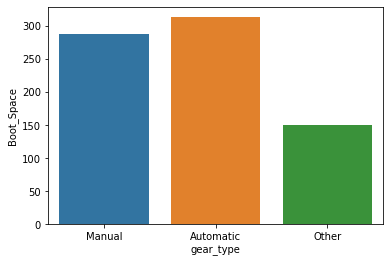

In [33]:
sns.barplot(x="gear_type",y= "Boot_Space",data=final_df,ci=False)
plt.show()

###### observation
* From the above plot we can conculde that manual gear cars are have boot space between 300 to 250
* From the above plot we can conculde that automatic gear car has more boot space than manual and other gear cars automatic gear cars has boot space above 300
* Other gear car has less boot space

In [34]:
final_df.gear_type.unique()

array(['Manual', 'Automatic', 'Other'], dtype=object)

In [35]:
new = {"Manual":0,"Automatic":1,"Other":2}

In [36]:
final_df["gear_type_num"] = final_df["gear_type"].map(new)

In [37]:
final_df[final_df.gear_type =="Automatic"].index[-40:]

Int64Index([813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825,
            826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838,
            839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 852,
            853],
           dtype='int64')

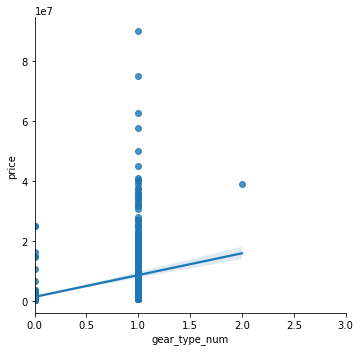

In [38]:
sns.lmplot(x ="gear_type_num",y= "price",data = final_df)
plt.xlim([0,3])
plt.show()

##### observation
* From the observaion we can say that automatic cars are costly than manual cars and othere cars

In [39]:
final_df.head()

,brand,model,variant_type,CC,gear_type,Boot_Space,price,gear_type_num
0,Tata,Punch,Pure,1199,Manual,366.0,582000,0
1,Tata,Punch,Pure Rhythm,1199,Manual,366.0,614000,0
2,Tata,Punch,Adventure,1199,Manual,366.0,664000,0
3,Tata,Punch,Adventure Rhythm,1199,Manual,366.0,699000,0
4,Tata,Punch,Adventure AMT,1199,Automatic,366.0,724000,1


In [40]:
cross = pd.crosstab(final_df.brand,final_df.gear_type)
cross

gear_type,Automatic,Manual,Other
brand,,,
Audi,21,1,0
BMW,46,0,0
Bentley,7,0,1
Datsun,1,5,0
Ferrari,5,0,0
Honda,10,19,0
ISUZU,4,3,0
Jaguar,11,0,0
Jeep,13,8,0


<AxesSubplot:xlabel='brand'>

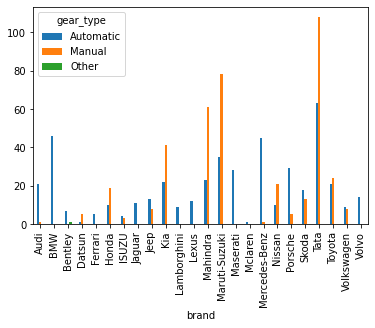

In [41]:
cross.plot.bar()

##### observation
* From above plot we can conclude that Tata brand has more manual cars, automatic cars and bmw,volvo,mclaren,Maserati,lexus,lamborghini and ferrari has no manual cars

In [42]:
final_df.columns

Index(['brand', 'model', 'variant_type', 'CC', 'gear_type', 'Boot_Space',
       'price', 'gear_type_num'],
      dtype='object')

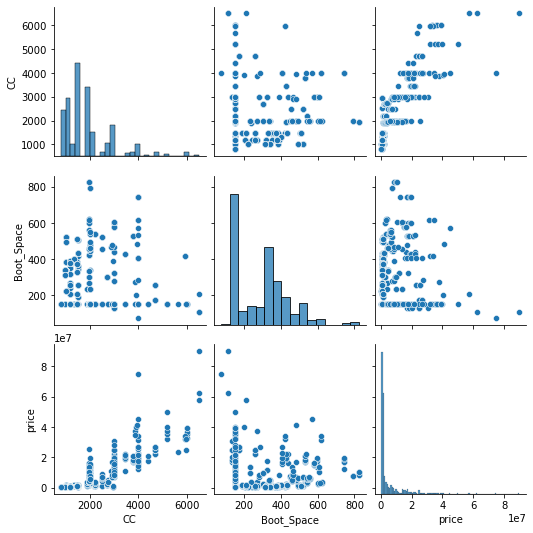

In [43]:
sns.pairplot(data=final_df,vars=["CC","Boot_Space","price"])

In [54]:
starting = int(input("Enter starting price: "))
ending = int(input("enter your ending price: "))
final_df[final_df.price.between(starting,ending)]

Enter starting price: 300000
enter your ending price: 700000


,brand,model,variant_type,CC,gear_type,Boot_Space,price,gear_type_num
0,Tata,Punch,Pure,1199,Manual,366.0,582000,0
1,Tata,Punch,Pure Rhythm,1199,Manual,366.0,614000,0
2,Tata,Punch,Adventure,1199,Manual,366.0,664000,0
3,Tata,Punch,Adventure Rhythm,1199,Manual,366.0,699000,0
107,Tata,Tiago,XE,1199,Manual,150.0,537000,0
...,...,...,...,...,...,...,...,...
803,Maruti-Suzuki,Super Carry,STD,1198,Manual,150.0,478000,0
804,Maruti-Suzuki,Super Carry,STD CNG,1198,Manual,150.0,583000,0
805,Maruti-Suzuki,Eeco Cargo,STD,1196,Manual,150.0,468000,0
806,Maruti-Suzuki,Eeco Cargo,STD CNG,1196,Manual,150.0,563000,0


In [ ]:
in_ = int(input("check the cars in tha price of: "))
final_df[final_df.price.isin([in_])]

In [ ]:
brand = input("enter the brand you prefer")
final_df[final_df.brand==brand]

In [ ]:
brand = input("enter the brand you prefer: ")
model = input("enter the variant you prefer: ")
final_df[(final_df.brand == brand) & (final_df.model == model)]